In [1]:
import sys
import os
from importlib import reload
import pylab as plt
import skimage
import numpy as np
from skimage import exposure

sys.path.insert(0, '../src')
import deepleeo.dataset.image_utils as iutils
import deepleeo.utils.geofunctions as gf
import deepleeo.utils.visualization as vis

reload(iutils)
reload(gf)
reload(vis)

<module 'deepleeo.utils.visualization' from '../src/deepleeo/utils/visualization.py'>

In [2]:
DATA_DIR = "/home/raian/doutorado/Dados/generated"

shp_ref = os.path.join(DATA_DIR, "Prodes_mosaic.shp")

input_files = {"2015": [os.path.join(DATA_DIR, "LC08_L1TP_224063_10092015.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_224064_24072015.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_225063_15072015.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_225064_16082015.tif")],
               "2016": [os.path.join(DATA_DIR, "LC08_L1TP_225064_17072016.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_224064_26072016.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_225063_17072016.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_224063_20072016.tif")],
               "2017": [os.path.join(DATA_DIR, "LC08_L1TP_225064_20072017.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_224064_29072017.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_225063_20072017.tif"),
                        os.path.join(DATA_DIR, "LC08_L1TP_224063_29072017.tif")]}

band_names = ["Green", "Red", "NIR", "SWIR_1", "SWIR_2"]

output_files = {"2015": os.path.join(DATA_DIR, "mosaic_2015.tif"),
                "2016": os.path.join(DATA_DIR, "mosaic_2016.tif"),
                "2017": os.path.join(DATA_DIR, "mosaic_2017.tif")}

temp_file = os.path.join(DATA_DIR, "mosaic_.tif")

In [3]:
iutils.mosaic_images(input_files["2015"], temp_file, band_names)
iutils.clip_img_by_extent(temp_file, shp_ref, output_files["2015"])

Mosaicing images:
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_224063_10092015.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_224064_24072015.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_225063_15072015.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_225064_16082015.tif

Processing file     1 of     4,  0.000% completed in 0 minutes.
Filename: /home/raian/doutorado/Dados/generated/LC08_L1TP_224063_10092015.tif
File Size: 7636x7813x5
Pixel Size: 0.000269 x -0.000269
UL:(-51.072347,-3.290171)   LR:(-49.014445,-5.395774)
Copy 0,0,7636,7813 to 6880,0,7637,7813.
Copy 0,0,7636,7813 to 6880,0,7637,7813.
Copy 0,0,7636,7813 to 6880,0,7637,7813.
Copy 0,0,7636,7813 to 6880,0,7637,7813.
Copy 0,0,7636,7813 to 6880,0,7637,7813.

Processing file     2 of     4, 25.000% completed in 0 minutes.
Filename: /home/raian/doutorado/Dados/generated/LC08_L1TP_224064_24072015.tif
File Size: 7657x7803x5
Pixel Size: 0.000269 x -0.000269
UL:(-51.392934,-4.736735)   LR:(-49.329373,-6.

/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:118: UserWarning: Possible sign loss when converting negative image of type int16 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Shape:  (11533, 13586, 5)
Green
-9999.0
{}
Red
-9999.0
{}
NIR
-9999.0
{}
SWIR_1
-9999.0
{}
SWIR_2
-9999.0
{}


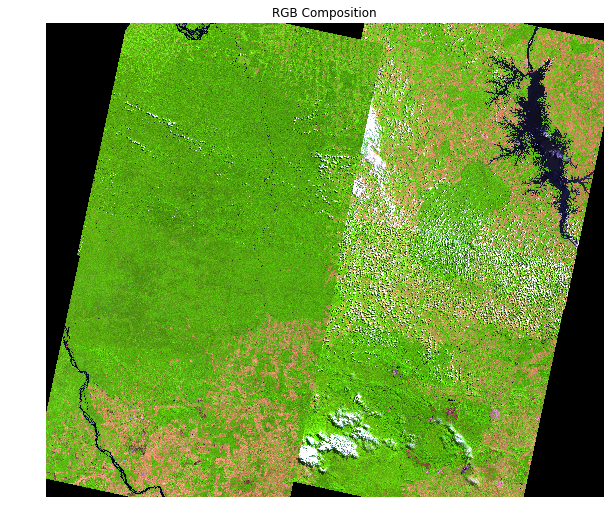

In [4]:
raster_img = gf.load_image(output_files["2015"], no_data=-9999)
vis.plot_rgb_img(raster_img, bands=[3,2,1], contrast=True)

print("Shape: ", raster_img.shape)

import gdal
ds = gdal.Open(output_files["2015"])
for band in range(1, ds.RasterCount + 1):
    print(ds.GetRasterBand(band).GetDescription())
    print(ds.GetRasterBand(band).GetNoDataValue())
    print(ds.GetRasterBand(band).GetMetadata())
ds = None

In [5]:
iutils.mosaic_images(input_files["2016"], temp_file, band_names)
iutils.clip_img_by_extent(temp_file, shp_ref, output_files["2016"])

Mosaicing images:
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_225064_17072016.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_224064_26072016.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_225063_17072016.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_224063_20072016.tif

Processing file     1 of     4,  0.000% completed in 0 minutes.
Filename: /home/raian/doutorado/Dados/generated/LC08_L1TP_225064_17072016.tif
File Size: 7646x7805x5
Pixel Size: 0.000269 x -0.000269
UL:(-52.934807,-4.736051)   LR:(-50.874210,-6.839499)
Copy 0,0,7646,7805 to 0,5365,7646,7805.
Copy 0,0,7646,7805 to 0,5365,7646,7805.
Copy 0,0,7646,7805 to 0,5365,7646,7805.
Copy 0,0,7646,7805 to 0,5365,7646,7805.
Copy 0,0,7646,7805 to 0,5365,7646,7805.

Processing file     2 of     4, 25.000% completed in 0 minutes.
Filename: /home/raian/doutorado/Dados/generated/LC08_L1TP_224064_26072016.tif
File Size: 7667x7803x5
Pixel Size: 0.000269 x -0.000269
UL:(-51.384789,-4.736709)   LR:(-49.318532,-6.

/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:118: UserWarning: Possible sign loss when converting negative image of type int16 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Shape:  (11533, 13586, 5)


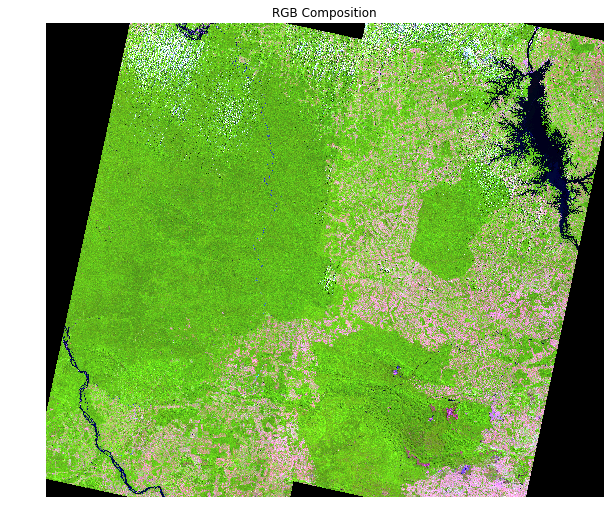

In [6]:
raster_img = gf.load_image(output_files["2016"], no_data=-9999)
vis.plot_rgb_img(raster_img, bands=[3,2,1], contrast=True)
print("Shape: ", raster_img.shape)

In [7]:
iutils.mosaic_images(input_files["2017"], temp_file, band_names)
iutils.clip_img_by_extent(temp_file, shp_ref, output_files["2017"])

Mosaicing images:
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_225064_20072017.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_224064_29072017.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_225063_20072017.tif
 > /home/raian/doutorado/Dados/generated/LC08_L1TP_224063_29072017.tif

Processing file     1 of     4,  0.000% completed in 0 minutes.
Filename: /home/raian/doutorado/Dados/generated/LC08_L1TP_225064_20072017.tif
File Size: 7646x7805x5
Pixel Size: 0.000269 x -0.000269
UL:(-52.923952,-4.736082)   LR:(-50.863355,-6.839529)
Copy 0,0,7646,7805 to 0,5365,7646,7805.
Copy 0,0,7646,7805 to 0,5365,7646,7805.
Copy 0,0,7646,7805 to 0,5365,7646,7805.
Copy 0,0,7646,7805 to 0,5365,7646,7805.
Copy 0,0,7646,7805 to 0,5365,7646,7805.

Processing file     2 of     4, 25.000% completed in 0 minutes.
Filename: /home/raian/doutorado/Dados/generated/LC08_L1TP_224064_29072017.tif
File Size: 7667x7803x5
Pixel Size: 0.000269 x -0.000269
UL:(-51.384789,-4.736709)   LR:(-49.318532,-6.

/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:118: UserWarning: Possible sign loss when converting negative image of type int16 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Shape:  (11533, 13586, 5)


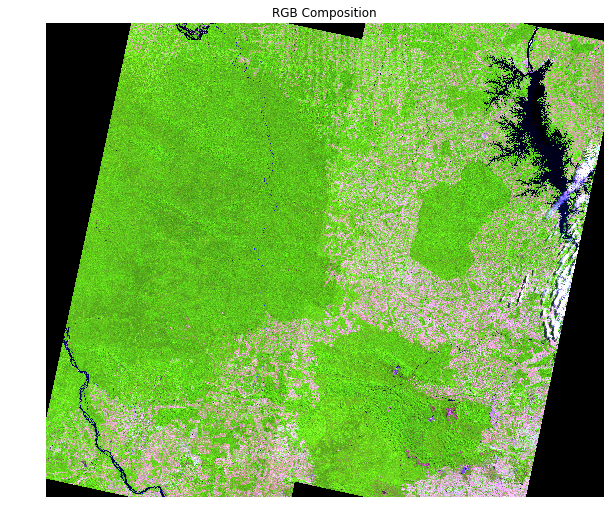

In [8]:
raster_img = gf.load_image(output_files["2017"], no_data=-9999)
vis.plot_rgb_img(raster_img, bands=[3,2,1], contrast=True)
print("Shape: ", raster_img.shape)

In [9]:
os.remove(temp_file)